In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

from sklearn.manifold import TSNE
from src.data.synthetic_gen import DataLoader
from src.utils.constants import FEATURES_NAMES

In [2]:
wgan_dl = DataLoader(problem="classification", model_name="WGAN #11", dataset_size=10)
dirichlet_dl = DataLoader(problem="classification", model_name="Dirichlet Estimator", dataset_size=10)

wgan_datasets, minmax = wgan_dl.load_cross_validation_datasets()
dirichlet_datasets, minmax = dirichlet_dl.load_cross_validation_datasets()

In [3]:
wgan_synthetic = pd.concat([ds["features"].loc[:, FEATURES_NAMES] for ds in wgan_datasets["train"]])
dirichlet_synthetic = pd.concat([ds["features"].loc[:, FEATURES_NAMES] for ds in dirichlet_datasets["train"]])
real = pd.concat([ds["features"].loc[:, FEATURES_NAMES] for ds in wgan_datasets["valid"]])

print(wgan_synthetic.shape)
print(dirichlet_synthetic.shape)
print(real.shape)

(13320, 26)
(13320, 26)
(220, 26)


In [4]:
wgan_synthetic.loc[:, "dataset"] = 0
dirichlet_synthetic.loc[:, "dataset"] = 1
real.loc[:, "dataset"] = 2

data = pd.concat([wgan_synthetic, dirichlet_synthetic, real], axis=0)
data

,zN2,zCO2,zC1,zC2,zC3,zIC4,zNC4,zIC5,zNC5,zC6,...,zC14,zC15,zC16,zC17,zC18,zC19,zC20,P,T,dataset
0,0.003925,0.006330,0.397596,0.031499,0.017979,0.003914,0.008651,0.002311,0.005076,0.008568,...,0.021105,0.021245,0.019526,0.021447,0.017792,0.018912,0.271983,-0.011994,0.501788,0
1,0.001793,0.034469,0.496388,0.026141,0.015530,0.001951,0.006076,0.001672,0.002177,0.005531,...,0.011612,0.010610,0.009608,0.007680,0.011331,0.008660,0.276146,0.136244,0.583685,0
2,0.003809,0.016235,0.529313,0.036862,0.020452,0.004151,0.009580,0.003793,0.005784,0.009901,...,0.011724,0.014537,0.011765,0.011067,0.011063,0.011202,0.170293,0.296473,0.516051,0
3,0.003309,0.079675,0.480823,0.073483,0.047826,0.005387,0.016392,0.004980,0.007024,0.010276,...,0.009687,0.006674,0.005915,0.004436,0.005474,0.005139,0.146211,0.061751,0.584920,0
4,0.006546,0.057909,0.461055,0.075488,0.046315,0.010062,0.021179,0.010992,0.013014,0.015580,...,0.012213,0.010652,0.009679,0.007399,0.008968,0.007341,0.097444,0.218858,0.518649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.003900,0.008800,0.620900,0.074300,0.049800,0.009600,0.019000,0.006000,0.008700,0.011700,...,0.007800,0.007400,0.005600,0.005000,0.005200,0.004900,0.065600,0.022519,0.017590,2
51,0.000800,0.025300,0.505300,0.038900,0.024100,0.005000,0.012200,0.004400,0.006900,0.006200,...,0.016300,0.014600,0.012800,0.010500,0.009100,0.007400,0.175100,0.211572,0.097664,2
52,0.003600,0.130300,0.463300,0.067900,0.049600,0.009000,0.019700,0.006400,0.010200,0.014000,...,0.008800,0.008500,0.006500,0.005900,0.005900,0.005300,0.083100,0.000993,0.427942,2
53,0.003700,0.101700,0.462300,0.071300,0.047400,0.008100,0.020800,0.006900,0.010700,0.013300,...,0.013400,0.010400,0.007000,0.005700,0.005900,0.005300,0.103600,0.091694,0.070211,2


In [5]:
tsne = TSNE(n_components=2, perplexity=30)
reduced_data = tsne.fit_transform(data.loc[:, FEATURES_NAMES])

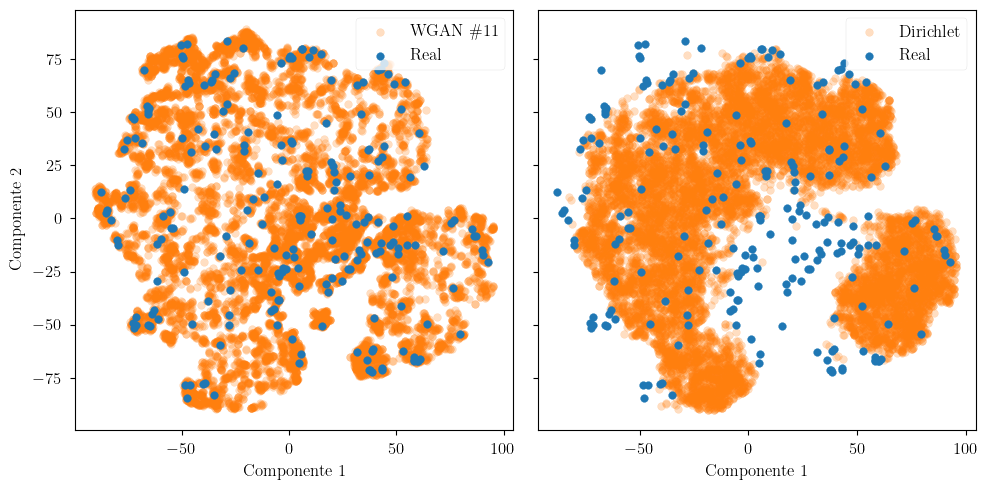

In [ ]:
f, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

for i, model in enumerate(["WGAN \#11", "Dirichlet"]):
    axs[i].scatter(reduced_data[data["dataset"] == i, 0], reduced_data[data["dataset"] == i, 1], c="tab:orange", label=model, alpha=0.25)
    axs[i].scatter(reduced_data[data["dataset"] == 2, 0], reduced_data[data["dataset"] == 2, 1], c="tab:blue", label="Real")
    axs[i].set_xlabel("Componente 1")
    axs[i].legend()

axs[0].set_ylabel("Componente 2")

f.tight_layout()
f.savefig(os.path.join("data", "images", "tsne_reduction_wgan11_dirichlet.png"), dpi=600, bbox_inches="tight")
plt.show()